In [94]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


In [95]:
sample = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv")
sample


,ID,total_amount
0,1,24.456348
1,2,24.374058
2,3,19.878154
3,4,25.015569
4,5,22.252489
...,...,...
995,996,24.438531
996,997,26.773706
997,998,22.192718
998,999,142.698686


In [96]:
data = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv")
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [97]:
data.shape

(175000, 17)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [99]:
test_data = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")
test_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.0
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.0
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.0
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.0
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.0


In [100]:
test_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'congestion_surcharge',
       'Airport_fee'],
      dtype='object')

In [101]:
X = data.drop('total_amount', axis = 1) #features
y = data['total_amount'] #label
categorical_columns = ['store_and_fwd_flag', 'payment_type']
#categorical variables are specified

In [102]:
from sklearn.model_selection import train_test_split

**Splitting the train dataset into train and val. The purpose of this is to have an unseen dataset from which to evaluate the trained model.**

In [103]:
X_train,X_val,y_train,y_val  = train_test_split(X,y,test_size = 0.2, random_state=42 )
#random state is 42 to ensure reproducibility i.e. the results will be the same after each run

**Encoding the Categorical Values using Ordinal Encoder. It helps in understanding the relationships between the features and the target variable.**

In [104]:
from sklearn.preprocessing import OrdinalEncoder

In [105]:
encoder = OrdinalEncoder()
X_train[categorical_columns] = encoder.fit_transform(X_train[categorical_columns])
X_val[categorical_columns] = encoder.transform(X_val[categorical_columns])

In [106]:
X_train

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
143961,1,2023-06-29 23:37:37,2023-06-30 00:13:00,1.0,7.79,1.0,0.0,181,174,1.0,1.0,7.956385,0.0,1.0,0.0,1.75
170292,1,2023-06-28 19:10:24,2023-06-28 18:54:42,1.0,0.79,1.0,0.0,250,226,1.0,2.5,2.276785,0.0,1.0,2.5,0.00
161029,1,2023-06-30 21:37:15,2023-06-30 21:32:03,1.0,0.29,2.0,0.0,236,251,4.0,0.0,1.062698,0.0,-1.0,-2.5,0.00
84006,0,2023-06-29 20:02:12,2023-06-29 21:09:59,1.0,0.60,1.0,0.0,83,166,1.0,3.5,2.444217,0.0,1.0,2.5,0.00
95628,0,2023-06-28 17:17:00,2023-06-28 17:41:09,1.0,1.90,1.0,0.0,70,35,1.0,5.0,5.163920,0.0,1.0,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1,2023-06-30 09:37:57,2023-06-30 09:55:10,1.0,1.49,1.0,0.0,101,202,1.0,0.0,3.260969,0.0,1.0,0.0,0.00
103694,0,2023-06-30 09:42:23,2023-06-30 08:55:33,1.0,1.60,1.0,0.0,221,41,1.0,2.5,3.382305,0.0,1.0,2.5,0.00
131932,0,2023-06-29 14:34:08,2023-06-29 15:00:01,1.0,1.80,1.0,0.0,18,128,1.0,2.5,6.751209,0.0,1.0,2.5,0.00
146867,1,2023-06-30 16:37:01,2023-06-30 17:43:52,1.0,0.60,1.0,0.0,84,226,0.0,2.5,1.815167,0.0,1.0,2.5,0.00


**Creating a new column called "duration." This duration is calculated by, firstly converting the tpep_pickup_datetime and tpep_dropoff_datetime from timestamps to datetime format. Then the difference of the 2 is taken and assigned to the duration column.**

In [107]:
X_train['tpep_pickup_datetime'] = pd.to_datetime(X_train['tpep_pickup_datetime'])
X_train['tpep_dropoff_datetime'] = pd.to_datetime(X_train['tpep_dropoff_datetime'])
X_train['duration'] = (X_train['tpep_dropoff_datetime'] - X_train['tpep_pickup_datetime']).dt.total_seconds()
X_train['duration'] = X_train['duration'] / 60

X_val['tpep_pickup_datetime'] = pd.to_datetime(X_val['tpep_pickup_datetime'])
X_val['tpep_dropoff_datetime'] = pd.to_datetime(X_val['tpep_dropoff_datetime'])
X_val['duration'] = (X_val['tpep_dropoff_datetime'] - X_val['tpep_pickup_datetime']).dt.total_seconds()
X_val['duration'] = X_val['duration'] / 60

**If the duration is less than 0(which is impossible), it is replaced with np.nan. Then those values are replaced with the median of the column.**

In [108]:
X_train.loc[X_train['duration'] < 0, 'duration'] = np.nan
median_duration = X_train['duration'].median()
X_train['duration'].fillna(median_duration, inplace=True)

X_val.loc[X_val['duration'] < 0, 'duration'] = np.nan
median_duration = X_val['duration'].median()
X_val['duration'].fillna(median_duration, inplace=True)


In [109]:
X_train

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,duration
143961,1,2023-06-29 23:37:37,2023-06-30 00:13:00,1.0,7.79,1.0,0.0,181,174,1.0,1.0,7.956385,0.0,1.0,0.0,1.75,35.383333
170292,1,2023-06-28 19:10:24,2023-06-28 18:54:42,1.0,0.79,1.0,0.0,250,226,1.0,2.5,2.276785,0.0,1.0,2.5,0.00,42.966667
161029,1,2023-06-30 21:37:15,2023-06-30 21:32:03,1.0,0.29,2.0,0.0,236,251,4.0,0.0,1.062698,0.0,-1.0,-2.5,0.00,42.966667
84006,0,2023-06-29 20:02:12,2023-06-29 21:09:59,1.0,0.60,1.0,0.0,83,166,1.0,3.5,2.444217,0.0,1.0,2.5,0.00,67.783333
95628,0,2023-06-28 17:17:00,2023-06-28 17:41:09,1.0,1.90,1.0,0.0,70,35,1.0,5.0,5.163920,0.0,1.0,2.5,0.00,24.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1,2023-06-30 09:37:57,2023-06-30 09:55:10,1.0,1.49,1.0,0.0,101,202,1.0,0.0,3.260969,0.0,1.0,0.0,0.00,17.216667
103694,0,2023-06-30 09:42:23,2023-06-30 08:55:33,1.0,1.60,1.0,0.0,221,41,1.0,2.5,3.382305,0.0,1.0,2.5,0.00,42.966667
131932,0,2023-06-29 14:34:08,2023-06-29 15:00:01,1.0,1.80,1.0,0.0,18,128,1.0,2.5,6.751209,0.0,1.0,2.5,0.00,25.883333
146867,1,2023-06-30 16:37:01,2023-06-30 17:43:52,1.0,0.60,1.0,0.0,84,226,0.0,2.5,1.815167,0.0,1.0,2.5,0.00,66.850000


In [110]:
X_val

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,duration
148789,0,2023-06-28 17:31:46,2023-06-28 18:22:12,1.0,1.50,1.0,0.0,212,237,1.0,5.0,6.533210,0.0,1.0,2.5,0.0,50.433333
169618,0,2023-06-29 19:15:55,2023-06-29 19:07:31,1.0,3.80,1.0,0.0,6,163,1.0,5.0,9.187048,0.0,1.0,2.5,0.0,42.600000
131258,1,2023-06-30 18:28:50,2023-06-30 18:01:19,2.0,1.89,1.0,0.0,35,81,1.0,2.5,6.793777,0.0,1.0,2.5,0.0,42.600000
31864,1,2023-06-30 22:57:37,2023-06-30 22:55:34,1.0,1.10,1.0,0.0,46,99,1.0,1.0,3.695121,0.0,1.0,2.5,0.0,42.600000
11032,1,2023-06-28 18:39:16,2023-06-28 17:31:29,2.0,2.84,1.0,0.0,213,114,1.0,2.5,7.838753,0.0,1.0,2.5,0.0,42.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118775,1,2023-06-29 19:56:43,2023-06-29 20:20:38,1.0,1.93,1.0,0.0,64,174,0.0,2.5,3.582341,0.0,1.0,2.5,0.0,23.916667
36053,0,2023-06-30 15:49:05,2023-06-30 16:09:04,1.0,2.30,1.0,0.0,189,209,1.0,2.5,6.269243,0.0,1.0,2.5,0.0,19.983333
123138,0,2023-06-30 18:14:56,2023-06-30 18:26:49,2.0,2.00,1.0,0.0,212,177,1.0,5.0,5.326641,0.0,1.0,2.5,0.0,11.883333
77368,1,2023-06-30 06:39:37,2023-06-30 06:15:04,1.0,1.44,1.0,0.0,51,90,1.0,0.0,4.339996,0.0,1.0,2.5,0.0,42.600000


In [111]:
y_train.isnull().sum()

0

In [112]:
y_val.isnull().sum()

0

In [113]:
X_train= X_train.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'],axis=1)
X_val = X_val.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'],axis=1)
#These columns are dropped from train and val

In [114]:
X_train.describe()
#Getting a summary of statistical properties of the dataset

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,duration
count,140000.000000,135159.000000,140000.000000,135159.000000,135159.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,135159.000000,135159.000000,140000.000000
mean,0.727286,1.359051,5.518944,1.516192,0.006984,132.789279,132.711471,0.943100,1.936735,6.126428,0.650111,0.979723,2.248259,0.159360,47.380521
std,0.446254,0.892499,441.583929,6.495888,0.083280,76.151281,76.219775,0.659844,1.951443,4.626301,2.328823,0.198490,0.817195,0.512795,44.093504
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,-7.500000,0.000079,-29.300000,-1.000000,-2.500000,-1.750000,0.000000
25%,0.000000,1.000000,1.080000,1.000000,0.000000,67.000000,67.000000,1.000000,0.000000,3.472274,0.000000,1.000000,2.500000,0.000000,33.800000
50%,1.000000,1.000000,1.840000,1.000000,0.000000,133.000000,133.000000,1.000000,1.000000,5.288747,0.000000,1.000000,2.500000,0.000000,42.966667
75%,1.000000,1.000000,3.620000,1.000000,0.000000,199.000000,199.000000,1.000000,2.500000,7.508931,0.000000,1.000000,2.500000,0.000000,53.200000
max,2.000000,9.000000,135182.060000,99.000000,1.000000,264.000000,264.000000,4.000000,11.750000,484.876151,80.000000,1.000000,2.500000,1.750000,1537.150000


In [115]:
X_train[X_train < 0] = np.nan
X_train.fillna(X_train.mean(), inplace=True)

**Visualizing the distribution of features**

array([[<Axes: title={'center': 'VendorID'}>,
        <Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>],
       [<Axes: title={'center': 'store_and_fwd_flag'}>,
        <Axes: title={'center': 'PULocationID'}>,
        <Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>],
       [<Axes: title={'center': 'extra'}>,
        <Axes: title={'center': 'tip_amount'}>,
        <Axes: title={'center': 'tolls_amount'}>,
        <Axes: title={'center': 'improvement_surcharge'}>],
       [<Axes: title={'center': 'congestion_surcharge'}>,
        <Axes: title={'center': 'Airport_fee'}>,
        <Axes: title={'center': 'duration'}>, <Axes: >]], dtype=object)

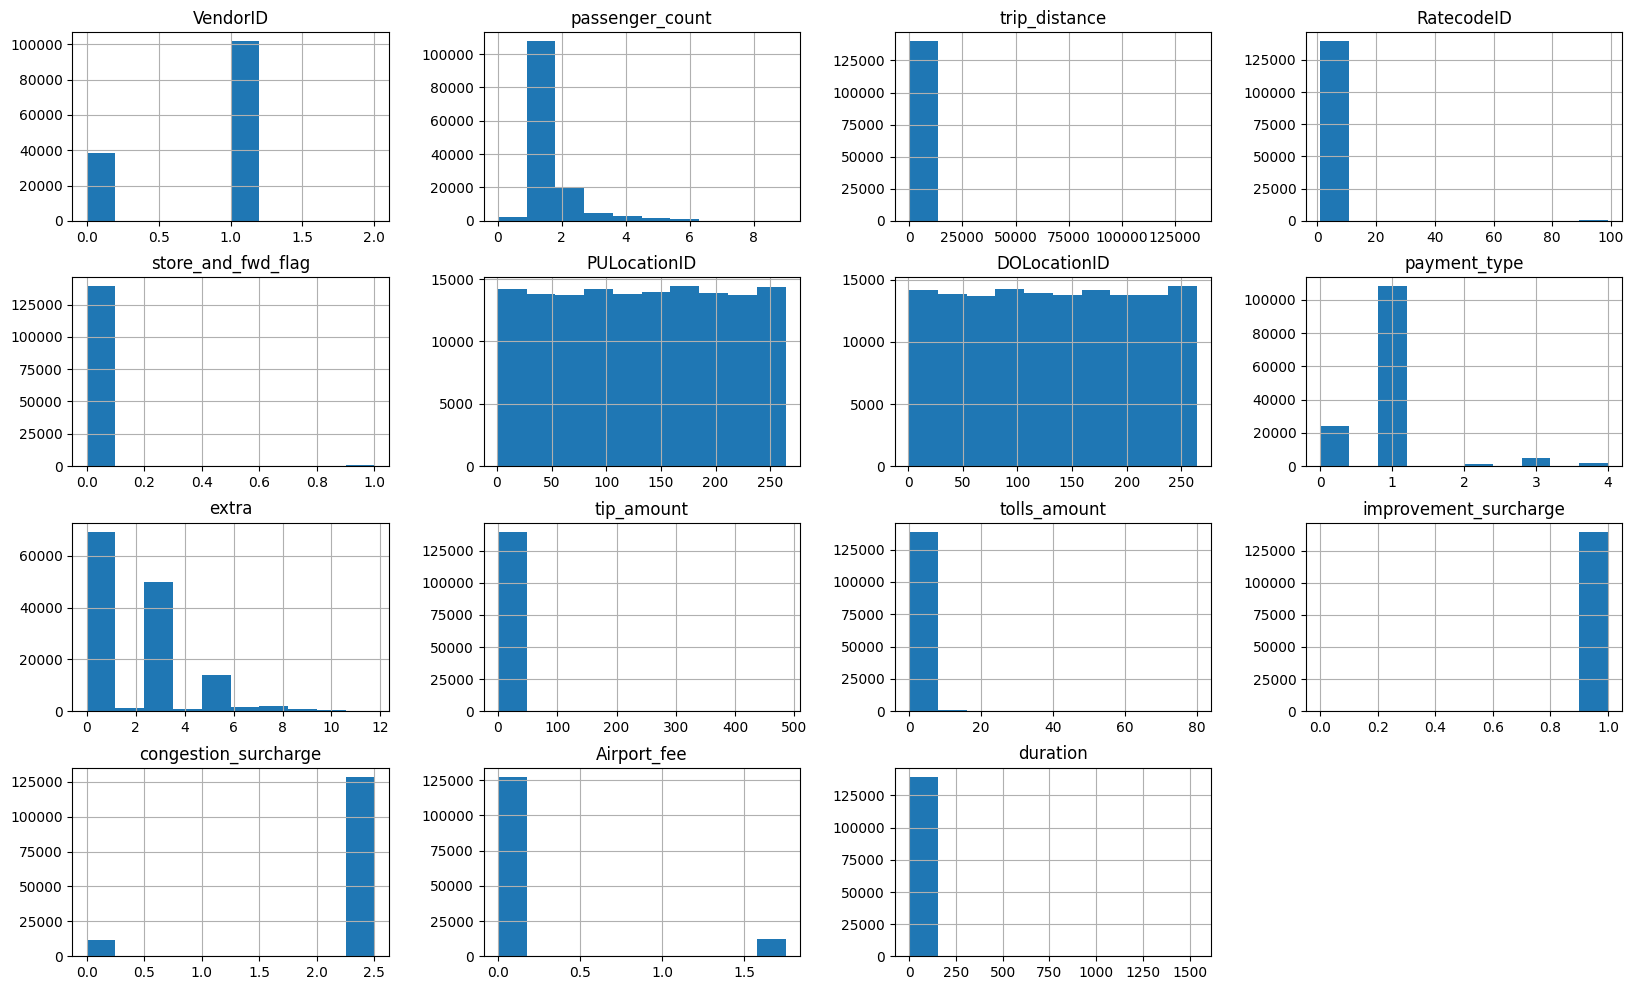

In [116]:
X_train.hist(figsize=(20,12))

In [117]:
mode_passenger_count = X_train['passenger_count'].mode().iloc[0]
X_train['passenger_count'] = X_train['passenger_count'].replace(0, mode_passenger_count)
X_train['trip_distance'] = X_train['trip_distance'].replace(0, X_train['trip_distance'].mean())
X_train['duration'] = X_train['duration'].replace(0, X_train['duration'].mean())
#replacing 0 values

In [118]:
X_train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,duration
count,140000.000000,140000.000000,140000.00000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000
mean,0.727286,1.375065,5.60232,1.516192,0.006984,132.789279,132.711471,0.943100,1.963105,6.126428,0.655686,0.999359,2.287256,0.162318,47.385598
std,0.446254,0.860952,441.58340,6.382590,0.081828,76.151281,76.219775,0.659844,1.920280,4.626301,2.317792,0.022867,0.682605,0.498412,44.090776
min,0.000000,1.000000,0.01000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000079,0.000000,0.000000,0.000000,0.000000,0.016667
25%,0.000000,1.000000,1.10000,1.000000,0.000000,67.000000,67.000000,1.000000,0.000000,3.472274,0.000000,1.000000,2.500000,0.000000,33.816667
50%,1.000000,1.000000,1.90000,1.000000,0.000000,133.000000,133.000000,1.000000,1.963105,5.288747,0.000000,1.000000,2.500000,0.000000,42.966667
75%,1.000000,1.000000,3.88000,1.000000,0.000000,199.000000,199.000000,1.000000,2.500000,7.508931,0.000000,1.000000,2.500000,0.000000,53.200000
max,2.000000,9.000000,135182.06000,99.000000,1.000000,264.000000,264.000000,4.000000,11.750000,484.876151,80.000000,1.000000,2.500000,1.750000,1537.150000


In [119]:
#Performing the same techniques of the val dataset
X_val[X_val < 0] = np.nan
X_val.fillna(X_val.mean(), inplace=True)

In [120]:
mode_passenger_count = X_val['passenger_count'].mode().iloc[0]
X_val['passenger_count'] = X_val['passenger_count'].replace(0, mode_passenger_count)
X_val['trip_distance'] = X_val['trip_distance'].replace(0, X_val['trip_distance'].mean())
X_val['duration'] = X_val['duration'].replace(0, X_val['duration'].mean())

In [121]:
X_val.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,duration
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000
mean,0.732743,1.368637,3.707847,1.526774,0.007404,132.394629,132.661257,0.947714,1.937699,6.131776,0.640385,0.999547,2.282177,0.159511,47.126093
std,0.442986,0.854179,4.829690,6.472051,0.084203,76.139140,76.084339,0.657588,1.907977,4.548502,2.310591,0.019555,0.689581,0.494354,43.322545
min,0.000000,1.000000,0.010000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000713,0.000000,0.000000,0.000000,0.000000,0.016667
25%,0.000000,1.000000,1.100000,1.000000,0.000000,66.000000,67.000000,1.000000,0.000000,3.477539,0.000000,1.000000,2.500000,0.000000,33.262500
50%,1.000000,1.000000,1.900000,1.000000,0.000000,132.000000,133.000000,1.000000,1.000000,5.275274,0.000000,1.000000,2.500000,0.000000,42.600000
75%,1.000000,1.000000,3.653874,1.000000,0.000000,199.000000,198.000000,1.000000,2.500000,7.472461,0.000000,1.000000,2.500000,0.000000,53.083333
max,2.000000,6.000000,79.550000,99.000000,1.000000,264.000000,264.000000,4.000000,11.750000,170.761373,76.000000,1.000000,2.500000,1.750000,1520.866667


In [122]:
#To understand the correlation between features
correlation_matrix = X_train.corr(method='pearson')

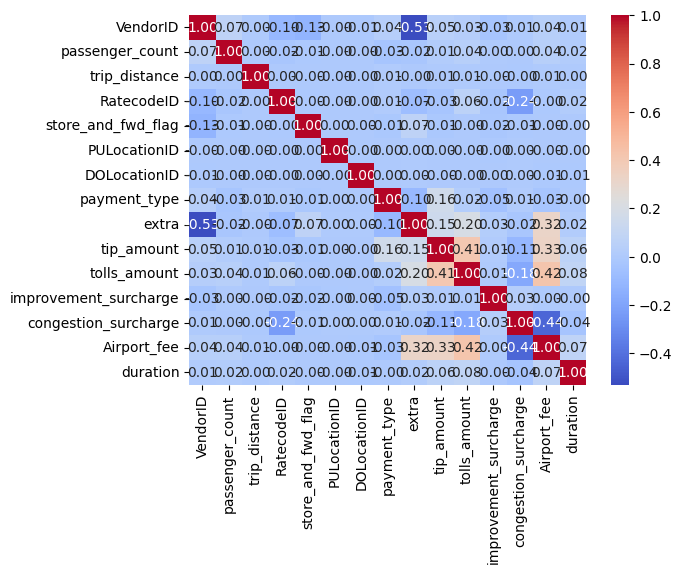

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

**Imputation Techniques being carried out on numerical features**

In [124]:
from sklearn.impute import SimpleImputer

In [125]:
imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)

In [126]:
X_train

array([[ 1.        ,  1.        ,  7.79      , ...,  0.        ,
         1.75      , 35.38333333],
       [ 1.        ,  1.        ,  0.79      , ...,  2.5       ,
         0.        , 42.96666667],
       [ 1.        ,  1.        ,  0.29      , ...,  2.28725626,
         0.        , 42.96666667],
       ...,
       [ 0.        ,  1.        ,  1.8       , ...,  2.5       ,
         0.        , 25.88333333],
       [ 1.        ,  1.        ,  0.6       , ...,  2.5       ,
         0.        , 66.85      ],
       [ 1.        ,  1.        ,  2.        , ...,  2.5       ,
         0.        , 51.33333333]])

In [127]:
X_val

array([[ 0.        ,  1.        ,  1.5       , ...,  2.5       ,
         0.        , 50.43333333],
       [ 0.        ,  1.        ,  3.8       , ...,  2.5       ,
         0.        , 42.6       ],
       [ 1.        ,  2.        ,  1.89      , ...,  2.5       ,
         0.        , 42.6       ],
       ...,
       [ 0.        ,  2.        ,  2.        , ...,  2.5       ,
         0.        , 11.88333333],
       [ 1.        ,  1.        ,  1.44      , ...,  2.5       ,
         0.        , 42.6       ],
       [ 1.        ,  2.        ,  2.28      , ...,  2.5       ,
         0.        , 85.46666667]])

**Using MinMaxScaler to normalize and standardize numerical features**

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [130]:
X_train_scaled 

array([[5.00000000e-01, 0.00000000e+00, 5.75520197e-05, ...,
        0.00000000e+00, 1.00000000e+00, 2.30081971e-02],
       [5.00000000e-01, 0.00000000e+00, 5.76999683e-06, ...,
        1.00000000e+00, 0.00000000e+00, 2.79416229e-02],
       [5.00000000e-01, 0.00000000e+00, 2.07128091e-06, ...,
        9.14902505e-01, 0.00000000e+00, 2.79416229e-02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.32414030e-05, ...,
        1.00000000e+00, 0.00000000e+00, 1.68278614e-02],
       [5.00000000e-01, 0.00000000e+00, 4.36448478e-06, ...,
        1.00000000e+00, 0.00000000e+00, 4.34792037e-02],
       [5.00000000e-01, 0.00000000e+00, 1.47208893e-05, ...,
        1.00000000e+00, 0.00000000e+00, 3.33846554e-02]])

In [131]:
X_val_scaled

array([[0.00000000e+00, 0.00000000e+00, 1.10221734e-05, ...,
        1.00000000e+00, 0.00000000e+00, 3.27991499e-02],
       [0.00000000e+00, 0.00000000e+00, 2.80362666e-05, ...,
        1.00000000e+00, 0.00000000e+00, 2.77030837e-02],
       [5.00000000e-01, 1.25000000e-01, 1.39071718e-05, ...,
        1.00000000e+00, 0.00000000e+00, 2.77030837e-02],
       ...,
       [0.00000000e+00, 1.25000000e-01, 1.47208893e-05, ...,
        1.00000000e+00, 0.00000000e+00, 7.71999827e-03],
       [5.00000000e-01, 0.00000000e+00, 1.05783275e-05, ...,
        1.00000000e+00, 0.00000000e+00, 2.77030837e-02],
       [5.00000000e-01, 1.25000000e-01, 1.67921703e-05, ...,
        1.00000000e+00, 0.00000000e+00, 5.55904931e-02]])

**Linear Regression**

In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
lin_reg_pred = reg.predict(X_val_scaled)

In [134]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [135]:
mse_linreg = mean_squared_error(y_val, lin_reg_pred)
print("Linear Regression MSE: ", mse_linreg)
r2_linreg = r2_score(y_val, lin_reg_pred)
print("Linear Regression R2: ", r2_linreg)

Linear Regression MSE:  205.61337746633257
Linear Regression R2:  0.6840402580938741


**Applying KFold and Cross Val Score**

In [136]:
from sklearn.model_selection import KFold, cross_val_score

In [137]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
cross_val = cross_val_score(reg, X_train_scaled, y_train, cv = kf, scoring = 'r2')
avg_r2 = np.mean(cross_val)
std_r2 = np.std(cross_val)
print("Mean R2: ", avg_r2)
print("Std R2: ", std_r2)

Mean R2:  0.687280244374856
Std R2:  0.01733923755218181


**Identical Preprocessing Techniques for Test Dataset**

In [138]:
test_data.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          1779
trip_distance               0
RatecodeID               1779
store_and_fwd_flag       1779
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     1779
Airport_fee              1779
dtype: int64

In [139]:
categorical_columns_test = ['store_and_fwd_flag', 'payment_type']
test_data[categorical_columns_test] = encoder.transform(test_data[categorical_columns_test])

In [140]:
test_data['tpep_pickup_datetime'] = pd.to_datetime(test_data['tpep_pickup_datetime'])
test_data['tpep_dropoff_datetime'] = pd.to_datetime(test_data['tpep_dropoff_datetime'])
test_data['duration'] = (test_data['tpep_dropoff_datetime'] - test_data['tpep_pickup_datetime']).dt.total_seconds()
test_data['duration'] = test_data['duration'] / 60

test_data.loc[test_data['duration'] < 0, 'duration'] = np.nan
median_duration = test_data['duration'].median()
test_data['duration'].fillna(median_duration, inplace=True)

In [141]:
test_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,duration
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,0.0,20,3,1.0,1.0,6.067612,0.0,1.0,2.5,0.0,4.000000
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,0.0,9,81,1.0,2.5,6.191269,0.0,1.0,2.5,0.0,8.500000
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,0.0,92,90,0.0,2.5,3.983872,0.0,1.0,2.5,0.0,66.733333
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,0.0,19,102,1.0,3.5,6.839341,0.0,1.0,2.5,0.0,12.450000
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,0.0,131,229,0.0,0.0,1.468943,0.0,1.0,0.0,0.0,28.383333


In [142]:
test_data= test_data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'],axis=1)


In [143]:
test_data.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,duration
0,1,1.0,4.95,1.0,0.0,20,3,1.0,1.0,6.067612,0.0,1.0,2.5,0.0,4.000000
1,1,1.0,2.10,1.0,0.0,9,81,1.0,2.5,6.191269,0.0,1.0,2.5,0.0,8.500000
2,1,1.0,0.95,1.0,0.0,92,90,0.0,2.5,3.983872,0.0,1.0,2.5,0.0,66.733333
3,0,1.0,0.80,1.0,0.0,19,102,1.0,3.5,6.839341,0.0,1.0,2.5,0.0,12.450000
4,1,1.0,4.01,1.0,0.0,131,229,0.0,0.0,1.468943,0.0,1.0,0.0,0.0,28.383333


In [144]:
test_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,duration
count,50000.000000,48221.000000,50000.000000,48221.000000,48221.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,48221.000000,48221.000000,50000.000000
mean,0.730280,1.358309,3.999013,1.567014,0.007051,132.208160,132.559300,0.945900,1.918050,6.107765,0.615867,0.981354,2.255345,0.152133,47.191428
std,0.444584,0.879948,78.958759,6.875115,0.083674,76.483766,76.410602,0.660895,1.938568,4.408572,2.289421,0.190203,0.803190,0.502866,47.120885
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,-7.500000,0.000409,-23.000000,-1.000000,-2.500000,-1.750000,0.000000
25%,0.000000,1.000000,1.090000,1.000000,0.000000,66.000000,67.000000,1.000000,0.000000,3.464018,0.000000,1.000000,2.500000,0.000000,33.133333
50%,1.000000,1.000000,1.850000,1.000000,0.000000,132.000000,133.000000,1.000000,1.000000,5.271687,0.000000,1.000000,2.500000,0.000000,42.700000
75%,1.000000,1.000000,3.600000,1.000000,0.000000,199.000000,199.000000,1.000000,2.500000,7.504048,0.000000,1.000000,2.500000,0.000000,53.183333
max,2.000000,8.000000,17624.430000,99.000000,1.000000,264.000000,264.000000,4.000000,11.750000,96.551343,47.750000,1.000000,2.500000,1.750000,4682.866667


In [145]:
mode_passenger_count = test_data['passenger_count'].mode().iloc[0]
test_data['passenger_count'] = test_data['passenger_count'].replace(0, mode_passenger_count)
test_data['trip_distance'] = test_data['trip_distance'].replace(0, test_data['trip_distance'].mean())
test_data['duration'] = test_data['duration'].replace(0, test_data['duration'].mean())

In [146]:
test_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,duration
count,50000.000000,48221.000000,50000.000000,48221.000000,48221.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,48221.000000,48221.000000,50000.000000
mean,0.730280,1.374505,4.058359,1.567014,0.007051,132.208160,132.559300,0.945900,1.918050,6.107765,0.615867,0.981354,2.255345,0.152133,47.198035
std,0.444584,0.863853,78.957234,6.875115,0.083674,76.483766,76.410602,0.660895,1.938568,4.408572,2.289421,0.190203,0.803190,0.502866,47.117576
min,0.000000,1.000000,0.010000,1.000000,0.000000,1.000000,1.000000,0.000000,-7.500000,0.000409,-23.000000,-1.000000,-2.500000,-1.750000,0.016667
25%,0.000000,1.000000,1.110000,1.000000,0.000000,66.000000,67.000000,1.000000,0.000000,3.464018,0.000000,1.000000,2.500000,0.000000,33.133333
50%,1.000000,1.000000,1.900000,1.000000,0.000000,132.000000,133.000000,1.000000,1.000000,5.271687,0.000000,1.000000,2.500000,0.000000,42.700000
75%,1.000000,1.000000,3.840000,1.000000,0.000000,199.000000,199.000000,1.000000,2.500000,7.504048,0.000000,1.000000,2.500000,0.000000,53.183333
max,2.000000,8.000000,17624.430000,99.000000,1.000000,264.000000,264.000000,4.000000,11.750000,96.551343,47.750000,1.000000,2.500000,1.750000,4682.866667


In [147]:
test_data = imputer.transform(test_data)

In [148]:
test_data_scaled = scaler.transform(test_data)
test_data_scaled

array([[5.00000000e-01, 0.00000000e+00, 3.65433133e-05, ...,
        1.00000000e+00, 0.00000000e+00, 2.59140391e-03],
       [5.00000000e-01, 0.00000000e+00, 1.54606325e-05, ...,
        1.00000000e+00, 0.00000000e+00, 5.51893134e-03],
       [5.00000000e-01, 0.00000000e+00, 6.95358592e-06, ...,
        1.00000000e+00, 0.00000000e+00, 4.34033049e-02],
       ...,
       [5.00000000e-01, 0.00000000e+00, 1.41290948e-05, ...,
        1.00000000e+00, 0.00000000e+00, 2.77681398e-02],
       [0.00000000e+00, 0.00000000e+00, 3.98721576e-05, ...,
        1.00000000e+00, 0.00000000e+00, 2.77681398e-02],
       [5.00000000e-01, 0.00000000e+00, 9.61666138e-06, ...,
        1.00000000e+00, 0.00000000e+00, 2.77681398e-02]])

**Applying KNeighbors Regressor along with hypertuning**

In [149]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [150]:
knn_model = KNeighborsRegressor()
param_grid_knn = {
    'n_neighbors': [1,3,5,7]
}
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, scoring = 'r2', cv = 5)
grid_search_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 5, 7]}, scoring='r2')

In [151]:
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

In [152]:
best_knn_model = KNeighborsRegressor(n_neighbors = best_params_knn['n_neighbors'])
best_knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=7)

In [175]:
print(best_params_knn)
print(best_score_knn)

{'n_neighbors': 7}
0.5910401672909182


In [154]:
'''from sklearn.svm import SVR
svm_reg = SVR(kernel = 'linear', C = 1.0)
svm_reg.fit(X_train_scaled, y_train)
y_pred_svm = svm_reg.predict(X_val_scaled)
svm_r2 = r2_score(y_val, y_pred_svm)
print("R2 Score SVM: ", svm_r2)'''

'from sklearn.svm import SVR\nsvm_reg = SVR(kernel = \'linear\', C = 1.0)\nsvm_reg.fit(X_train_scaled, y_train)\ny_pred_svm = svm_reg.predict(X_val_scaled)\nsvm_r2 = r2_score(y_val, y_pred_svm)\nprint("R2 Score SVM: ", svm_r2)'

**Applying DecisionTree Regression**

In [155]:
from sklearn.tree import DecisionTreeRegressor

In [156]:
dtc = DecisionTreeRegressor(random_state=42)
dtc.fit(X_train_scaled, y_train)
dtc_pred = dtc.predict(X_val_scaled)
dtc_r2 = r2_score(y_val, dtc_pred)
print("R2 Score dtc: ", dtc_r2)

R2 Score dtc:  0.8842965469330288


**Applying XGB Regressor**

In [157]:
import xgboost as xgb

In [158]:
xgb_reg = xgb.XGBRegressor(n_estimators = 10, max_depth = 5, objective='reg:squarederror', random_state=42)
xgb_reg.fit(X_train_scaled, y_train)
xgb_reg_pred = xgb_reg.predict(X_val_scaled)
xgb_r2 = r2_score(y_val, xgb_reg_pred)
print("R-squared (XGBoost):", xgb_r2)

R-squared (XGBoost): 0.928521239221292


**Applying Random Forest Regressor**

In [159]:
from sklearn.ensemble import RandomForestRegressor

In [160]:
'''from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", grid_search.best_params_)'''

'from sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    \'n_estimators\': [100, 200],\n    \'max_depth\': [None, 10],\n    \'min_samples_split\': [2, 5],\n    \'min_samples_leaf\': [1, 2]\n}\n\nrf_reg = RandomForestRegressor(random_state=42)\ngrid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring=\'r2\')\ngrid_search.fit(X_train_scaled, y_train)\n\nprint("Best Hyperparameters:", grid_search.best_params_)'

In [161]:
rf_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_reg.fit(X_train_scaled, y_train)
rf_reg_pred = rf_reg.predict(X_val_scaled)
rf_r2 = r2_score(y_val, rf_reg_pred)
print("R-squared (Random Forest):", rf_r2)

R-squared (Random Forest): 0.953615984328923


**Applying MLP Regressor**

In [162]:
from sklearn.neural_network import MLPRegressor

In [163]:
mlp_reg = MLPRegressor(random_state = 42, early_stopping = True, max_iter = 300)
mlp_reg.fit(X_train_scaled, y_train)
mlp_pred = mlp_reg.predict(X_val_scaled)
mlp_r2 = r2_score(y_val, mlp_pred)
print("R-Squared: ", mlp_r2)

R-Squared:  0.7758522650415699


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [164]:
X_train_scaled.shape, test_data_scaled.shape

((140000, 15), (50000, 15))

**Applying Principal Component Analysis**

In [165]:
from sklearn.decomposition import PCA

pca = PCA(random_state = 42, n_components = 6)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
print(pca.explained_variance_ratio_)


[0.25194854 0.18585713 0.18542585 0.13534234 0.10225542 0.06005833]


In [166]:
reg = LinearRegression() 
reg.fit(X_train_pca, y_train)
y_val_pca_pred = reg.predict(X_val_pca)
r2_pca_val = r2_score(y_val,y_val_pca_pred)
print("R2 Score for PCA Lin Reg: ", r2_pca_val)

R2 Score for PCA Lin Reg:  0.33073532406726414


In [167]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_pca, y_train)
y_val_dt_reg_pred = dt_reg.predict(X_val_pca)
r2_dt_reg_val = r2_score(y_val, y_val_dt_reg_pred)
print("R2 Score for Decision Tree Regression: ", r2_dt_reg_val)

R2 Score for Decision Tree Regression:  0.5095186256857633


**Comparing the performace of Decision Tree, XGBoost Regressor and Random Forest**

In [168]:
import matplotlib.pyplot as plt

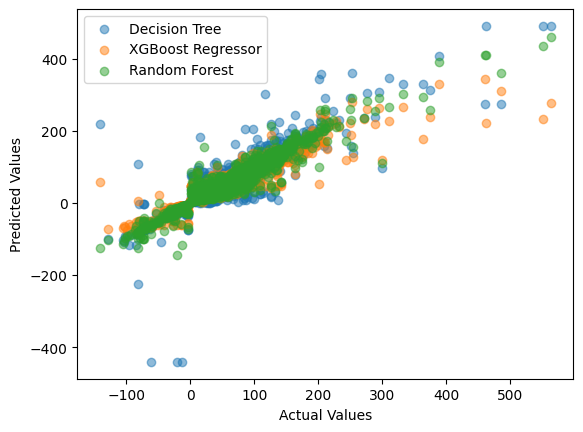

In [169]:
plt.scatter(y_val, dtc_pred, label = "Decision Tree", alpha = 0.5)
plt.scatter(y_val, xgb_reg_pred, label = "XGBoost Regressor", alpha = 0.5)
plt.scatter(y_val, rf_reg_pred, label = "Random Forest", alpha = 0.5)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

* This dataset contains both categorical as well as numerical data. It has been  appropriately encoded and scaled.
* I have also added a duration column which includes the difference between the pickup time and the dropoff time.
* The dataset has been preprocessed and imputed successfully, thereby ensuring a suitable foundation for model development. Unecessary columns such as the pickup and dropoff times, were dropped.
* My top 3 models are Decision Tree, Random Forest, and XGB Regressor. The R2 scores of all these models are listed above. The comparison between these 3 models is shown above.
* The final model which I have chosen to submit is Random Forest, which had the highest R2 score on the validation data.

* The scatter plot mentioned above shows the comparison between 3 models. Most of the points are located near the diagonal line (y = x) , implying that the model's predication is mostly accurate.
* There are very few outliers which indicate, that the models are performing well, to the unseen data.

In [172]:
pred_test_final = rf_reg.predict(test_data_scaled)
submission_df = pd.DataFrame({'ID': np.arange(1,50001), 'total_amount': pred_test_final})

In [173]:
submission_df

,ID,total_amount
0,1,36.4272
1,2,25.8564
2,3,17.2866
3,4,15.0813
4,5,23.4490
...,...,...
49995,49996,15.7265
49996,49997,27.1982
49997,49998,21.0106
49998,49999,36.7614


In [174]:
submission_df.to_csv("submission.csv", index = False)